In [3]:
import numpy as np
import scipy.linalg
import numpy.linalg
import time
from scipy import sparse
import scipy.sparse.linalg
from sympy import *
import matplotlib.pyplot as plt
from math import *

3.2 (a)

In [5]:
def clgs(A):
    (m,n) = A.shape
    V = A.copy()
    Q = np.eye(m,n)
    Q = np.matrix(Q, dtype=np.float64)
    R = np.zeros((n,n))
    R = np.matrix(R, dtype=np.float64)
    for j in range(n):
        for i in range(j):
            R[i,j] = np.matmul(Q[:,i].T,A[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        R[j,j] = numpy.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
        
    return Q, R
        
def mgs(A):
    (m,n) = A.shape
    Q = A.copy()
    R = np.zeros((n,n))
    R = np.matrix(R, dtype=np.float64)
    for i in range(n-1):
        R[i,i] = numpy.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:] = np.matmul(Q[:,i].T,Q[:,i+1:])
        Q[:,i+1:] = Q[:,i+1:] - np.matmul(Q[:,i],R[i,i+1:])
    R[n-1,n-1] = numpy.linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q, R

In [117]:
U, X = numpy.linalg.qr(np.random.randn(80,80))
V, X = numpy.linalg.qr(np.random.randn(80,80))
S = np.diag(2**(-1-np.arange(80,dtype=float)))
A = U*S*V
A = np.matrix(A, dtype=np.float64)
Qc, Rc = clgs(A.copy())
Qm, Rm = mgs(A.copy())
Qr, Rr = numpy.linalg.qr(A.copy())
print(Rc)
print(Rm)
print(Rr)

[[6.69243389e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.09708900e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.84572530e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.03180569e-26
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.14230881e-27 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.98948362e-27]]
[[6.69243389e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.09708900e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.84572530e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.03180569e-26
  0.00000000e+00 0.00000000e+00]

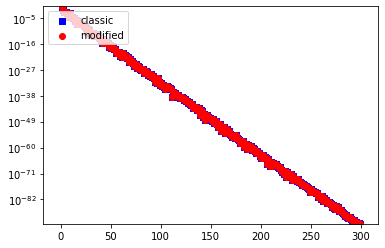

In [17]:
x = []
yc = []
ym = []
for j in range(1,300):
    U, X = numpy.linalg.qr(np.random.randn(j,j))
    V, X = numpy.linalg.qr(np.random.randn(j,j))
    S = np.diag(2**(-1-np.arange(j,dtype=float)))
    A = U*S*V
    A = np.matrix(A, dtype=np.float64)
    Qc, Rc = clgs(A.copy())
    Qm, Rm = mgs(A.copy())
    x.append(j)
    yc.append(Rc[j-1,j-1])
    ym.append(Rm[j-1,j-1])

plt.scatter(x,yc,c='b',marker='s',label='classic') 
plt.scatter(x,ym,c='r',marker='o',label='modified')
plt.legend(loc='upper left')
plt.yscale('log')
plt.ylim(ym[-1],1)
plt.show()
#300까지는 차이가 없었다, 그 이상을 테스트해보았지만 컴퓨터의 한계상 마무리가 불가능하였다.

3.2 (b)

In [320]:
def qrhouse(A):
    (m,n) = A.shape
    R = A.copy()
    V = np.zeros((m,n))
    V = np.matrix(V, dtype=np.float64)
    for k in range(min(m-1,n)):
        x = R[k:,k]
        v = x+int(np.sign(x[0]))*numpy.linalg.norm(x)*np.eye(len(x),1)
        v = np.matrix(v, dtype=np.float64)
        V[k:,k] = v
        R[k:,k:] = R[k:,k:]-(2*v)*(v.T*R[k:,k:])/(v.T*v)
    R = np.triu(R[:n,:n])
        
    return V, R

def formQ(V):
    (m,n) = V.shape 
    Q = np.eye(m,n)
    for j in range(min(m-1,n)-1,-1,-1):
        v = V[:,j]
        Q = Q-(2*v)*(v.T*Q)/(v.T*v) 
    return Q

In [321]:
A = np.matrix([[0.70000,0.70711],[0.70001,0.70711]])
Qm,Rm = mgs(A.copy())
v,r = qrhouse(A.copy())
q = formQ(v)
print('error of householder:')
print(numpy.linalg.norm(q.T*q-np.eye(2)))
print('error of modified:')
print(numpy.linalg.norm(Qm.T*Qm-np.eye(2)))
# 하우스홀더가 계산측면에서 더 안정적이다

error of householder:
3.451616545114987e-16
error of modified:
3.254726094493924e-11


3.3

In [42]:
def givens(A):
    (m,n) = A.shape
    Q = np.eye(m)
    for j in range(n):
        for i in range(m-1,j,-1):
            theta = atan(A[i,j]/A[i-1,j])
            G = np.eye(m)
            G[i,i] = cos(theta)
            G[i,i-1] = -sin(theta)
            G[i-1,i] = sin(theta)
            G[i-1,i-1] = cos(theta)
            Q = np.matmul(Q,G.T)
            A = np.matmul(G,A)
    Q = Q[:m,:n]
    A = A[:n,:n]
    return Q, A        

In [81]:
A = np.random.randn(4,3)
Q, R = givens(A.copy())
print('givens Q =')
print(Q)
print('givens R =')
print(R)

Qr, Rr = numpy.linalg.qr(A.copy())
print('Real Q =')
print(Qr)
print('Real R =')
print(Rr)

givens Q =
[[ 0.86199332 -0.02977699  0.19628097]
 [ 0.4501418  -0.37550114 -0.1358649 ]
 [ 0.21687619  0.92395087 -0.11830044]
 [ 0.08546693 -0.06653586 -0.96385658]]
givens R =
[[ 7.35476229e-01 -7.25366926e-01 -1.01875798e+00]
 [-2.58587495e-17  1.32776939e+00 -3.59627739e-01]
 [ 3.71039402e-17 -2.15312820e-17 -3.81699377e-01]]
Real Q =
[[-0.86199332 -0.02977699  0.19628097]
 [-0.4501418  -0.37550114 -0.1358649 ]
 [-0.21687619  0.92395087 -0.11830044]
 [-0.08546693 -0.06653586 -0.96385658]]
Real R =
[[-0.73547623  0.72536693  1.01875798]
 [ 0.          1.32776939 -0.35962774]
 [ 0.          0.         -0.38169938]]


4.3 (a)

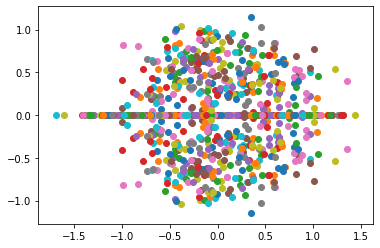

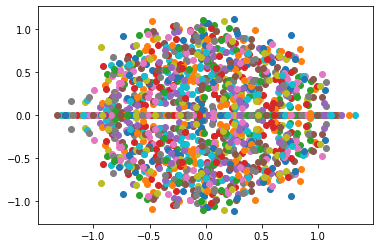

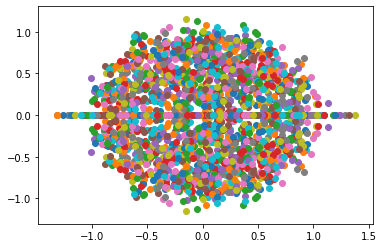

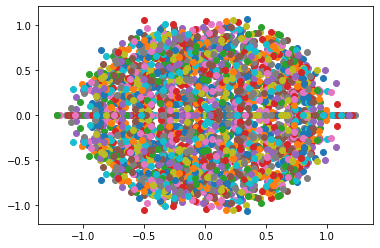

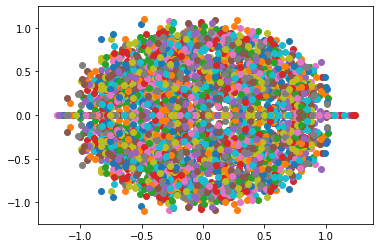

In [174]:
for i in range(5):
    m = 8*(i+1)
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        eig = numpy.linalg.eigvals(A)
        x = eig.real
        y = eig.imag
        plt.scatter(x,y)
    plt.show()
    
    #m이 커질수록 = 실수축과 허수축을 가지는 타원으로 수렴하는 것을 알 수 있다

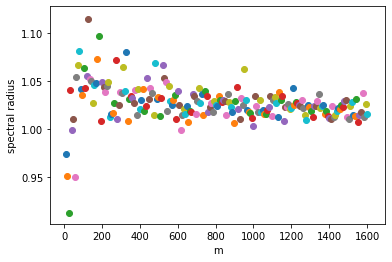

In [12]:
for i in range(200):
    m = 8*(i+1)
    A = np.random.randn(m,m)/np.sqrt(m)
    eig = numpy.linalg.eigvals(A)
    radius = max(np.absolute(eig))
    plt.scatter(m,radius)
plt.xlabel('m')
plt.ylabel('spectral radius')
plt.show()
#spectral radius는 1로 수렴

4.3 (b)

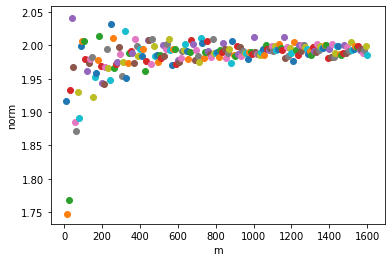

In [13]:
for i in range(200):
    m = 8*(i+1)
    A = np.random.randn(m,m)/np.sqrt(m)
    u,s,vh = numpy.linalg.svd(A)
    norm = max(s)
    plt.scatter(m,norm)
plt.xlabel('m')
plt.ylabel('norm')
plt.show()
#norm은 2로 수렴

4.3 (c)

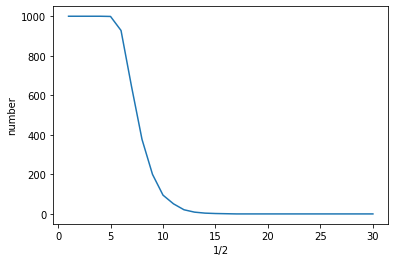

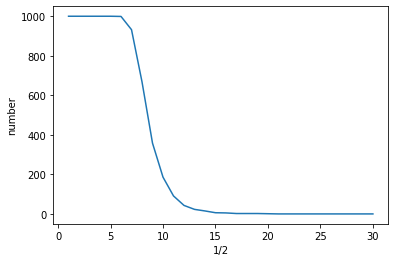

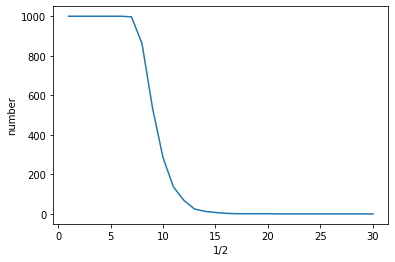

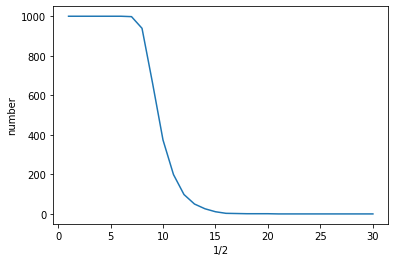

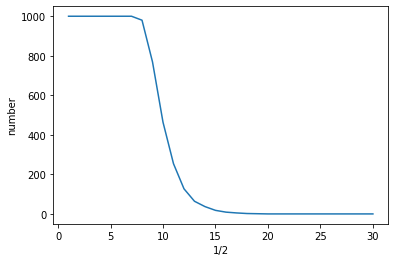

In [237]:
for k in range(5):
    y = np.zeros(30)
    m = (k+1)*100
    for j in range(1000):
        A = np.random.randn(m,m)/np.sqrt(m)
        u,s,vh = numpy.linalg.svd(A)
        sigma = min(s)
        for i in range(30, 0, -1):
            if sigma <= 2**(-i):
                for j in range(i):
                    y[j] += 1
                break
            else:
                continue
    x = range(1,31,1)      
    plt.plot(x,y)
    plt.xlabel('1/2')
    plt.ylabel('number')
    plt.show()
# 변곡점을 가지는 3차함수 모양을 보이며, m이 커질수록 변곡점의 위치가 오른쪽으로 가다가 2^(-10) 근처에서 수렴한다

4.3 (d)

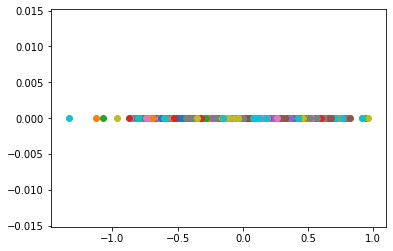

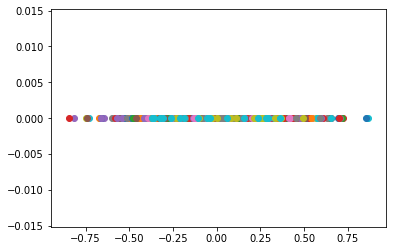

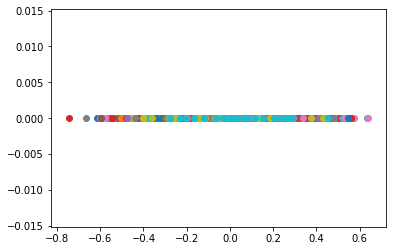

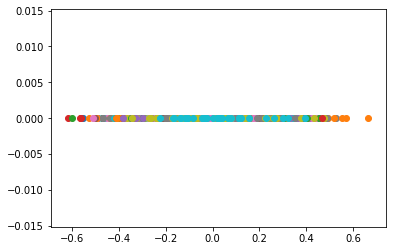

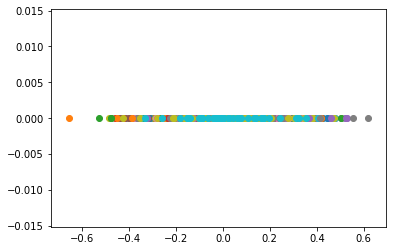

In [242]:
#d-(a)
for i in range(5):
    m = 8*(i+1)
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        A = np.triu(A)
        eig = numpy.linalg.eigvals(A)
        x = eig.real
        y = eig.imag
        plt.scatter(x,y)
    plt.
    plt.show()
# m이 커질수록 실수축(x축)으로 수렴한다

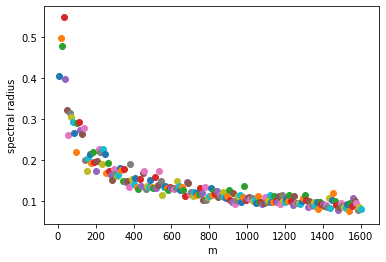

In [14]:
for i in range(200):
    m = 8*(i+1)
    A = np.random.randn(m,m)/np.sqrt(m)
    A = np.triu(A)
    eig = numpy.linalg.eigvals(A)
    radius = max(np.absolute(eig))
    plt.scatter(m,radius)
plt.xlabel('m')
plt.ylabel('spectral radius')
plt.show()
# spectral radius는 0.1근처로 수렴

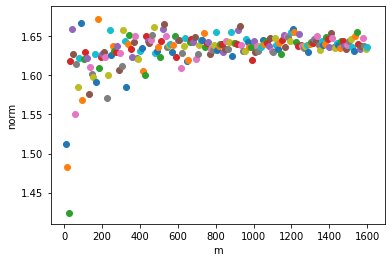

In [15]:
#d-(b)
for i in range(200):
    m = 8*(i+1)
    A = np.random.randn(m,m)/np.sqrt(m)
    A = np.triu(A)
    u,s,vh = numpy.linalg.svd(A)
    norm = max(s)
    plt.scatter(m,norm)
plt.xlabel('m')
plt.ylabel('norm')
plt.show()
# norm은 1.65 근처로 수렴

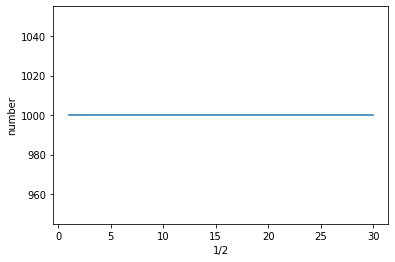

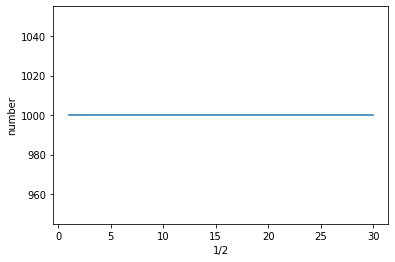

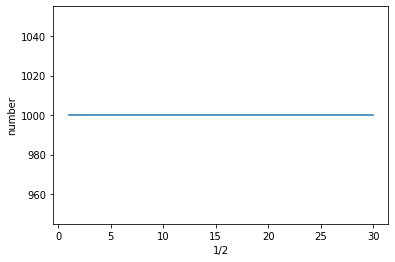

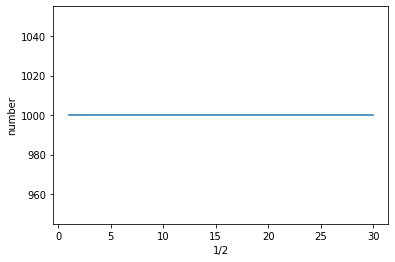

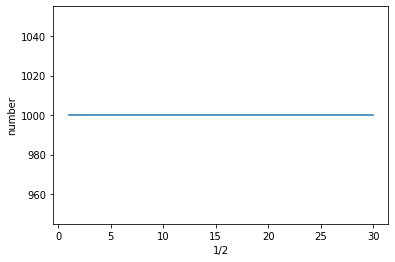

In [243]:
#d-(c)
for k in range(5):
    y = np.zeros(30)
    m = (k+1)*100
    for j in range(1000):
        A = np.random.randn(m,m)/np.sqrt(m)
        A = np.triu(A)
        u,s,vh = numpy.linalg.svd(A)
        sigma = min(s)
        for i in range(30, 0, -1):
            if sigma <= 2**(-i):
                for j in range(i):
                    y[j] += 1
                break
            else:
                continue
    x = range(1,31,1)      
    plt.plot(x,y)
    plt.xlabel('1/2')
    plt.ylabel('number')
    plt.show()
    # 전부 1/2보다 작다

4.6 (a) 

[[ 1.0091799 ]
 [-0.11969505]
 [-7.70770298]
 [-0.22291224]
 [10.55725943]
 [ 0.45098979]
 [-6.24505067]
 [ 0.38302407]
 [ 1.45583153]
 [ 0.12435456]
 [-0.43522534]
 [ 0.10021087]]


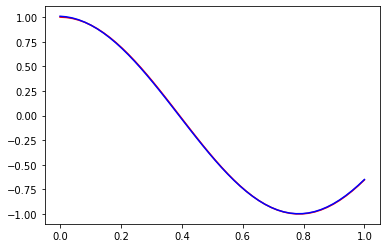

In [389]:
t = np.linspace(0,1,50,dtype=np.float64)
A = np.fliplr(np.vander(t,12))
A = np.matrix(A,dtype=np.float64)
b = np.cos(4*t)
x = np.matmul(np.matmul(numpy.linalg.inv(np.matmul(A.T,A)),A.T),b)
x = x.reshape((12,1))

print(x)

x1 = np.matmul(A,x)
plt.plot(t, b,'r-')
plt.plot(t, x1,'b-')
plt.show()


4.6 (b)

[[ 1.00000000e+00]
 [-7.80741850e-07]
 [-7.99996781e+00]
 [-5.16377008e-04]
 [ 1.06709431e+01]
 [-2.06445282e-02]
 [-5.62772565e+00]
 [-1.10758970e-01]
 [ 1.73549472e+00]
 [-2.48104577e-02]
 [-3.61374792e-01]
 [ 8.57179143e-02]]


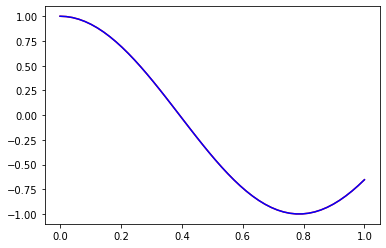

In [6]:
t = np.linspace(0,1,50,dtype=np.float64)
A = np.fliplr(np.vander(t,12))
A = np.matrix(A,dtype=np.float64)
b = np.cos(4*t)
Q,R = mgs(A)
x = np.matmul(numpy.linalg.inv(R),np.matmul(Q.T,b).T)

print(x)

x1 = np.matmul(A,x)
plt.plot(t, b,'r-')
plt.plot(t, x1,'b-')
plt.show()

4.6 (c)

[[ 1.00000000e+00]
 [-4.22743050e-07]
 [-7.99998124e+00]
 [-3.18763239e-04]
 [ 1.06694308e+01]
 [-1.38202883e-02]
 [-5.64707563e+00]
 [-7.53160257e-02]
 [ 1.69360697e+00]
 [ 6.03210744e-03]
 [-3.74241703e-01]
 [ 8.80405760e-02]]


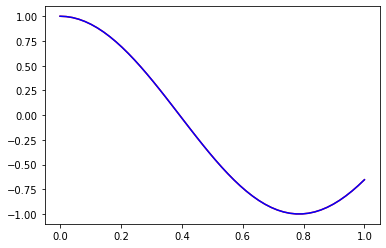

In [322]:
t = np.linspace(0,1,50,dtype=np.float64)
A = np.fliplr(np.vander(t,12))
A = np.matrix(A,dtype=np.float64)
b = np.cos(4*t)
V,R = qrhouse(A)
Q = formQ(V)
x = np.matmul(numpy.linalg.inv(R),np.matmul(Q.T,b).T)

print(x)

x1 = np.matmul(A,x)
plt.plot(t, b,'r-')
plt.plot(t, x1,'b-')
plt.show()

4.6 (d)

[[ 1.00000000e+00]
 [-4.22742764e-07]
 [-7.99998124e+00]
 [-3.18763193e-04]
 [ 1.06694308e+01]
 [-1.38202872e-02]
 [-5.64707563e+00]
 [-7.53160213e-02]
 [ 1.69360696e+00]
 [ 6.03211095e-03]
 [-3.74241704e-01]
 [ 8.80405762e-02]]


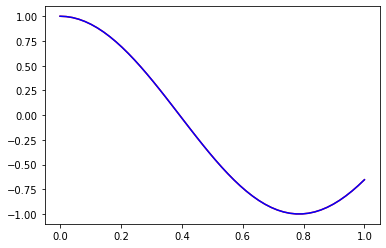

In [345]:
t = np.linspace(0,1,50,dtype=np.float64)
A = np.fliplr(np.vander(t,12))
A = np.matrix(A,dtype=np.float64)
b = np.cos(4*t)
Q,R = numpy.linalg.qr(A)
x = np.matmul(numpy.linalg.inv(R),np.matmul(Q.T,b).T)

print(x)

x1 = np.matmul(A,x)
plt.plot(t, b,'r-')
plt.plot(t, x1,'b-')
plt.show()


4.6 (e)

[[ 1.00000000e+00]
 [-4.22742747e-07]
 [-7.99998124e+00]
 [-3.18763179e-04]
 [ 1.06694308e+01]
 [-1.38202867e-02]
 [-5.64707563e+00]
 [-7.53160186e-02]
 [ 1.69360696e+00]
 [ 6.03211341e-03]
 [-3.74241705e-01]
 [ 8.80405764e-02]]


C:\Users\HTG\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


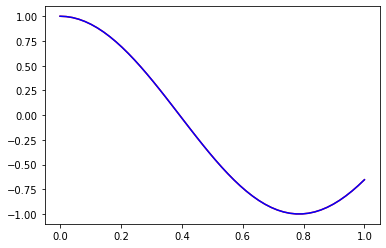

In [385]:
t = np.linspace(0,1,50,dtype=np.float64)
A = np.fliplr(np.vander(t,12))
A = np.matrix(A,dtype=np.float64)
b = np.cos(4*t)
x, residuals, rank, s = np.array(numpy.linalg.lstsq(A,b))
x = x.reshape((12,1))

print(x)

x1 = np.matmul(A,x)

plt.plot(t, b,'r-')
plt.plot(t, x1,'b-')
plt.show()

4.6 (f)

[[ 1.00000000e+00]
 [-4.22742779e-07]
 [-7.99998124e+00]
 [-3.18763206e-04]
 [ 1.06694308e+01]
 [-1.38202875e-02]
 [-5.64707563e+00]
 [-7.53160220e-02]
 [ 1.69360696e+00]
 [ 6.03211031e-03]
 [-3.74241704e-01]
 [ 8.80405763e-02]]


C:\Users\HTG\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


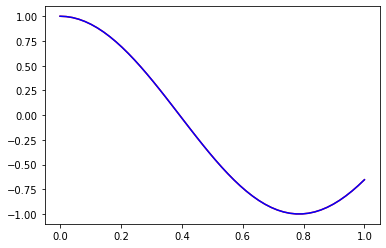

In [384]:
t = np.linspace(0,1,50,dtype=np.float64)
A = np.fliplr(np.vander(t,12))
A = np.matrix(A,dtype=np.float64)
b = np.cos(4*t)
U,s,Vh = numpy.linalg.svd(A)
S = np.diag(s, k=38)
S = S[:,38:]
S = 1/S
S[S == np.inf] = 0
x = np.matmul(Vh.T*S.T*U.T,b)
x = x.reshape((12,1))

print(x)

x1 = np.matmul(A,x)
x1 = x1.reshape((50,-1))

plt.plot(t, b,'r-')
plt.plot(t, x1,'b-')
plt.show()

4.6 (g)

Normal equation

<font color='red'>[[ 1.0091799 ]
 [-0.11969505]
 [-7.70770298]
 [-0.22291224]
 [10.55725943]
 [ 0.45098979]
 [-6.24505067]
 [ 0.38302407]
 [ 1.45583153]
 [ 0.12435456]
 [-0.43522534]
 [ 0.10021087]]</font>
 
mgs 

[[ 1.00000000e+00]
 <font color='red'>[-7.80741850e-07]</font>
 [-7.99996781e+00]
 <font color='red'>[-5.16377008e-04]</font>
 [ 1.06709431e+01]
 [-2.06445282e-02]
 [-5.62772565e+00]
 <font color='red'>[-1.10758970e-01]</font>
 [ 1.73549472e+00]
 <font color='red'>[-2.48104577e-02]</font>
 [-3.61374792e-01]
 [ 8.57179143e-02]]
 
 qrhouse
 
 [[ 1.00000000e+00]
 [-4.22743050e-07]
 [-7.99998124e+00]
 [-3.18763239e-04]
 [ 1.06694308e+01]
 [-1.38202883e-02]
 [-5.64707563e+00]
 [-7.53160257e-02]
 [ 1.69360697e+00]
 [ 6.03210744e-03]
 [-3.74241703e-01]
 [ 8.80405760e-02]]
 
 python's qr
 
 [[ 1.00000000e+00]
 [-4.22742764e-07]
 [-7.99998124e+00]
 [-3.18763193e-04]
 [ 1.06694308e+01]
 [-1.38202872e-02]
 [-5.64707563e+00]
 [-7.53160213e-02]
 [ 1.69360696e+00]
 [ 6.03211095e-03]
 [-3.74241704e-01]
 [ 8.80405762e-02]]
 
 A/b
 
 [[ 1.00000000e+00]
 [-4.22742747e-07]
 [-7.99998124e+00]
 [-3.18763179e-04]
 [ 1.06694308e+01]
 [-1.38202867e-02]
 [-5.64707563e+00]
 [-7.53160186e-02]
 [ 1.69360696e+00]
 [ 6.03211341e-03]
 [-3.74241705e-01]
 [ 8.80405764e-02]]
 
 svd
 
[[ 1.00000000e+00]
 [-4.22742779e-07]
 [-7.99998124e+00]
 [-3.18763206e-04]
 [ 1.06694308e+01]
 [-1.38202875e-02]
 [-5.64707563e+00]
 [-7.53160220e-02]
 [ 1.69360696e+00]
 [ 6.03211031e-03]
 [-3.74241704e-01]
 [ 8.80405763e-02]]
 
 Normal equation이 매우 unstable하며 modified G-S도 약간 unstable하다